# TRIPS data analysis

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the large CSV file in chunks
chunksize = 10**6
chunk_list = []  # list to hold the batches

# Read the CSV file in chunks
for chunk in pd.read_csv('../TRIPS_data/lb_counts_with_cell_angles.csv', chunksize=chunksize, index_col=0):
    # Process each chunk here
    chunk_list.append(chunk)

# Concatenate all the chunks into a single DataFrame
trips_df = pd.concat(chunk_list)

# Display basic info
display("Basic Information:")
display(trips_df.info())

# Display the first few rows
display("\nFirst few rows:")
display(trips_df.head())


'Basic Information:'

<class 'pandas.core.frame.DataFrame'>
Index: 57627 entries, D1_lib8_bc1_10_bc2_10_bc3_67 to D1_lib7_bc1_9_bc2_96_bc3_55
Columns: 3071 entries, cell_angle to b4800
dtypes: float64(3071)
memory usage: 1.3+ GB


None

'\nFirst few rows:'

,cell_angle,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,...,b4780,b4784,b4787,b4789,b4790,b4793,b4795,b4796,b4799,b4800
Cell Barcode,,,,,,,,,,,,,,,,,,,,,
D1_lib8_bc1_10_bc2_10_bc3_67,242.539120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_10_bc3_74,41.013960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_11_bc3_12,310.904330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_11_bc3_34,1.399475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_lib8_bc1_10_bc2_12_bc3_46,264.440060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Display summary statistics
display("\nSummary Statistics:")
display(trips_df.describe())



'\nSummary Statistics:'

,cell_angle,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,...,b4780,b4784,b4787,b4789,b4790,b4793,b4795,b4796,b4799,b4800
count,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,...,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000,57627.000000
mean,183.001442,0.059677,0.012789,0.026255,0.003332,0.007896,0.001926,0.183022,0.014559,0.019140,...,0.001944,0.033352,0.003557,0.000885,0.003644,0.005744,0.005935,0.004807,0.005379,0.005865
std,102.456299,0.253589,0.113440,0.165021,0.058225,0.089481,0.043846,0.456193,0.121221,0.139902,...,0.044435,0.184420,0.059538,0.029736,0.060544,0.075800,0.077034,0.069913,0.073148,0.077265
min,0.009521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.539580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,182.349490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,270.652370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,359.985300,4.000000,2.000000,3.000000,2.000000,2.000000,1.000000,5.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000


In [3]:
# Check for missing values
display("\nMissing Values:")
display(trips_df.isnull().sum())

# Check for duplicate rows
display("\nDuplicate Rows:")
display(trips_df.duplicated().sum())

'\nMissing Values:'

cell_angle    0
b0002         0
b0003         0
b0004         0
b0005         0
             ..
b4793         0
b4795         0
b4796         0
b4799         0
b4800         0
Length: 3071, dtype: int64

'\nDuplicate Rows:'

0

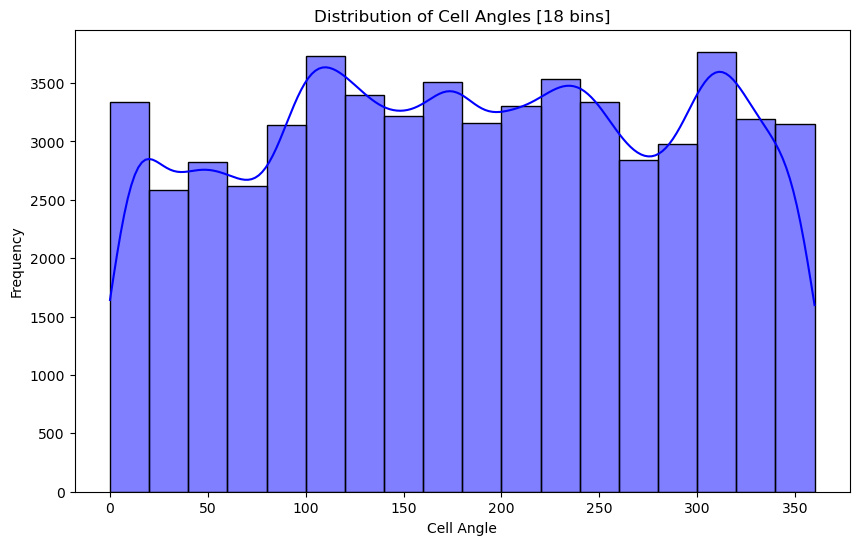

In [4]:
# Histogram of the 'cell_angle'
n_bins = 18
plt.figure(figsize=(10, 6))

sns.histplot(trips_df['cell_angle'], bins=n_bins,
             kde=True, color='blue')
plt.title(f'Distribution of Cell Angles [{n_bins} bins]')
plt.xlabel('Cell Angle')
plt.ylabel('Frequency')
plt.show()

In [5]:
cell_angles = trips_df['cell_angle']
cell_angles

Cell Barcode
D1_lib8_bc1_10_bc2_10_bc3_67    242.539120
D1_lib8_bc1_10_bc2_10_bc3_74     41.013960
D1_lib8_bc1_10_bc2_11_bc3_12    310.904330
D1_lib8_bc1_10_bc2_11_bc3_34      1.399475
D1_lib8_bc1_10_bc2_12_bc3_46    264.440060
                                   ...    
D1_lib7_bc1_9_bc2_94_bc3_21      58.899530
D1_lib7_bc1_9_bc2_94_bc3_52      75.914670
D1_lib7_bc1_9_bc2_95_bc3_52     207.060010
D1_lib7_bc1_9_bc2_96_bc3_37     266.678300
D1_lib7_bc1_9_bc2_96_bc3_55     146.209400
Name: cell_angle, Length: 57627, dtype: float64

In [6]:
df = trips_df.drop(columns=['cell_angle']).astype('int').T
df 


Cell Barcode,D1_lib8_bc1_10_bc2_10_bc3_67,D1_lib8_bc1_10_bc2_10_bc3_74,D1_lib8_bc1_10_bc2_11_bc3_12,D1_lib8_bc1_10_bc2_11_bc3_34,D1_lib8_bc1_10_bc2_12_bc3_46,D1_lib8_bc1_10_bc2_12_bc3_73,D1_lib8_bc1_10_bc2_14_bc3_23,D1_lib8_bc1_10_bc2_14_bc3_64,D1_lib8_bc1_10_bc2_15_bc3_6,D1_lib8_bc1_10_bc2_17_bc3_19,...,D1_lib7_bc1_9_bc2_91_bc3_80,D1_lib7_bc1_9_bc2_92_bc3_44,D1_lib7_bc1_9_bc2_92_bc3_72,D1_lib7_bc1_9_bc2_92_bc3_85,D1_lib7_bc1_9_bc2_93_bc3_13,D1_lib7_bc1_9_bc2_94_bc3_21,D1_lib7_bc1_9_bc2_94_bc3_52,D1_lib7_bc1_9_bc2_95_bc3_52,D1_lib7_bc1_9_bc2_96_bc3_37,D1_lib7_bc1_9_bc2_96_bc3_55
b0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
genes = df.index.tolist()
genes 

['b0002',
 'b0003',
 'b0004',
 'b0005',
 'b0006',
 'b0007',
 'b0008',
 'b0009',
 'b0010',
 'b0014',
 'b0015',
 'b0019',
 'b0020',
 'b0023',
 'b0024',
 'b0025',
 'b0026',
 'b0027',
 'b0028',
 'b0029',
 'b0030',
 'b0031',
 'b0032',
 'b0033',
 'b0037',
 'b0038',
 'b0039',
 'b0046',
 'b0047',
 'b0048',
 'b0049',
 'b0050',
 'b0051',
 'b0052',
 'b0053',
 'b0054',
 'b0055',
 'b0056',
 'b0057',
 'b0058',
 'b0059',
 'b0060',
 'b0065',
 'b0066',
 'b0067',
 'b0068',
 'b0069',
 'b0070',
 'b0071',
 'b0072',
 'b0073',
 'b0074',
 'b0077',
 'b0080',
 'b0081',
 'b0082',
 'b0083',
 'b0084',
 'b0085',
 'b0086',
 'b0087',
 'b0088',
 'b0089',
 'b0090',
 'b0091',
 'b0092',
 'b0093',
 'b0094',
 'b0095',
 'b0096',
 'b0097',
 'b0098',
 'b0099',
 'b0101',
 'b0102',
 'b0103',
 'b0104',
 'b0106',
 'b0107',
 'b0109',
 'b0110',
 'b0111',
 'b0112',
 'b0113',
 'b0114',
 'b0115',
 'b0116',
 'b0118',
 'b0119',
 'b0120',
 'b0121',
 'b0122',
 'b0123',
 'b0124',
 'b0125',
 'b0126',
 'b0127',
 'b0128',
 'b0129',
 'b0130',


In [8]:
cells = df.columns.tolist()
cells 


['D1_lib8_bc1_10_bc2_10_bc3_67',
 'D1_lib8_bc1_10_bc2_10_bc3_74',
 'D1_lib8_bc1_10_bc2_11_bc3_12',
 'D1_lib8_bc1_10_bc2_11_bc3_34',
 'D1_lib8_bc1_10_bc2_12_bc3_46',
 'D1_lib8_bc1_10_bc2_12_bc3_73',
 'D1_lib8_bc1_10_bc2_14_bc3_23',
 'D1_lib8_bc1_10_bc2_14_bc3_64',
 'D1_lib8_bc1_10_bc2_15_bc3_6',
 'D1_lib8_bc1_10_bc2_17_bc3_19',
 'D1_lib8_bc1_10_bc2_18_bc3_28',
 'D1_lib8_bc1_10_bc2_19_bc3_69',
 'D1_lib8_bc1_10_bc2_20_bc3_79',
 'D1_lib8_bc1_10_bc2_21_bc3_44',
 'D1_lib8_bc1_10_bc2_21_bc3_70',
 'D1_lib8_bc1_10_bc2_21_bc3_77',
 'D1_lib8_bc1_10_bc2_22_bc3_14',
 'D1_lib8_bc1_10_bc2_23_bc3_11',
 'D1_lib8_bc1_10_bc2_23_bc3_4',
 'D1_lib8_bc1_10_bc2_23_bc3_41',
 'D1_lib8_bc1_10_bc2_24_bc3_29',
 'D1_lib8_bc1_10_bc2_24_bc3_4',
 'D1_lib8_bc1_10_bc2_24_bc3_6',
 'D1_lib8_bc1_10_bc2_24_bc3_67',
 'D1_lib8_bc1_10_bc2_24_bc3_80',
 'D1_lib8_bc1_10_bc2_26_bc3_40',
 'D1_lib8_bc1_10_bc2_27_bc3_48',
 'D1_lib8_bc1_10_bc2_27_bc3_68',
 'D1_lib8_bc1_10_bc2_28_bc3_45',
 'D1_lib8_bc1_10_bc2_28_bc3_80',
 'D1_lib8_bc1_

In [22]:

# ----- Binning the cell angles -----
# Define bins from 0 to 360 in 10-degree increments.
bin_angle_increment = 10
bins = np.arange(0, 370, bin_angle_increment) # 0, 10, 20, ..., 360

# Create labels for the bins, e.g., "0-10", "10-20", ..., "350-360"
labels = [f"{b}-{b+bin_angle_increment}" for b in bins[:-1]]

# Bin the angles. Using right=False ensures that each bin covers [start, start+10).
angle_bins = pd.cut(cell_angles, bins=bins, right=False, labels=labels, include_lowest=True)

angle_bins


Cell Barcode
D1_lib8_bc1_10_bc2_10_bc3_67    240-250
D1_lib8_bc1_10_bc2_10_bc3_74      40-50
D1_lib8_bc1_10_bc2_11_bc3_12    310-320
D1_lib8_bc1_10_bc2_11_bc3_34       0-10
D1_lib8_bc1_10_bc2_12_bc3_46    260-270
                                 ...   
D1_lib7_bc1_9_bc2_94_bc3_21       50-60
D1_lib7_bc1_9_bc2_94_bc3_52       70-80
D1_lib7_bc1_9_bc2_95_bc3_52     200-210
D1_lib7_bc1_9_bc2_96_bc3_37     260-270
D1_lib7_bc1_9_bc2_96_bc3_55     140-150
Name: cell_angle, Length: 57627, dtype: category
Categories (36, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '320-330' < '330-340' < '340-350' < '350-360']

In [23]:
gene_vs_cell_angle_bins_df = df.copy()

# Replace the columns (cell barcodes) with their corresponding angle bin values
new_columns = gene_vs_cell_angle_bins_df.columns.map(angle_bins)
gene_vs_cell_angle_bins_df.columns = new_columns

display(gene_vs_cell_angle_bins_df)


Cell Barcode,240-250,40-50,310-320,0-10,260-270,280-290,210-220,220-230,30-40,270-280,...,100-110,200-210,150-160,40-50,260-270,50-60,70-80,200-210,260-270,140-150
b0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Sum the gene expressions within each bin
summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()
display(summed_df.head())

/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_55074/1822395937.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()
/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_55074/1822395937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summed_df = gene_vs_cell_angle_bins_df.groupby(axis=1, level=0).sum()


Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
b0002,108,98,79,83,112,103,92,89,91,143,...,87,87,86,94,79,107,97,92,94,95
b0003,15,25,18,21,17,21,14,28,27,25,...,19,16,14,19,19,18,21,15,15,17
b0004,33,45,31,32,35,37,46,36,44,55,...,31,35,35,39,47,59,54,32,28,49
b0005,1,6,6,3,4,9,3,2,10,3,...,3,8,3,4,1,4,6,2,3,8
b0006,18,17,9,13,11,11,12,9,8,15,...,5,7,11,12,11,12,15,10,8,12


In [25]:
# Initialize an empty DataFrame to store z-scores of the summed values
zscore_sum_df = pd.DataFrame(index=summed_df.index, columns=summed_df.columns)

# Calculate z-scores for the summed values for each gene within each bin
for gene in summed_df.index:
    values = summed_df.loc[gene].values
    if len(values) > 1:  # Only calculate z-score if there are multiple values
        mean = np.mean(values)
        std = np.std(values, ddof=1)  # Use ddof=1 for sample standard deviation
        z_scores = [(x - mean) / std if std != 0 else 0 for x in values]  # Avoid division by zero
    else:
        z_scores = [0]  # If only one value, z-score is 0

    zscore_sum_df.loc[gene] = z_scores

# Display the z-score DataFrame
display(zscore_sum_df.head())

Cell Barcode,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,...,260-270,270-280,280-290,290-300,300-310,310-320,320-330,330-340,340-350,350-360
b0002,0.798968,0.15837,-1.058766,-0.802527,1.055207,0.478669,-0.225989,-0.418168,-0.290049,3.041062,...,-0.546288,-0.546288,-0.610348,-0.097869,-1.058766,0.734908,0.09431,-0.225989,-0.097869,-0.033809
b0003,-1.017183,0.841628,-0.459539,0.098104,-0.645421,0.098104,-1.203064,1.399272,1.213391,0.841628,...,-0.273658,-0.831302,-1.203064,-0.273658,-0.273658,-0.459539,0.098104,-1.017183,-1.017183,-0.645421
b0004,-0.964092,0.317409,-1.177675,-1.070884,-0.750508,-0.536925,0.4242,-0.643717,0.210617,1.385326,...,-1.177675,-0.750508,-0.750508,-0.323342,0.530992,1.812493,1.278534,-1.070884,-1.49805,0.744576
b0005,-1.543127,0.237404,0.237404,-0.830914,-0.474808,1.305723,-0.830914,-1.187021,1.661829,-0.830914,...,-0.830914,0.949616,-0.830914,-0.474808,-1.543127,-0.474808,0.237404,-1.187021,-0.830914,0.949616
b0006,1.162554,0.945705,-0.789091,0.078307,-0.355392,-0.355392,-0.138543,-0.789091,-1.005941,0.512006,...,-1.656489,-1.22279,-0.355392,-0.138543,-0.355392,-0.138543,0.512006,-0.572242,-1.005941,-0.138543


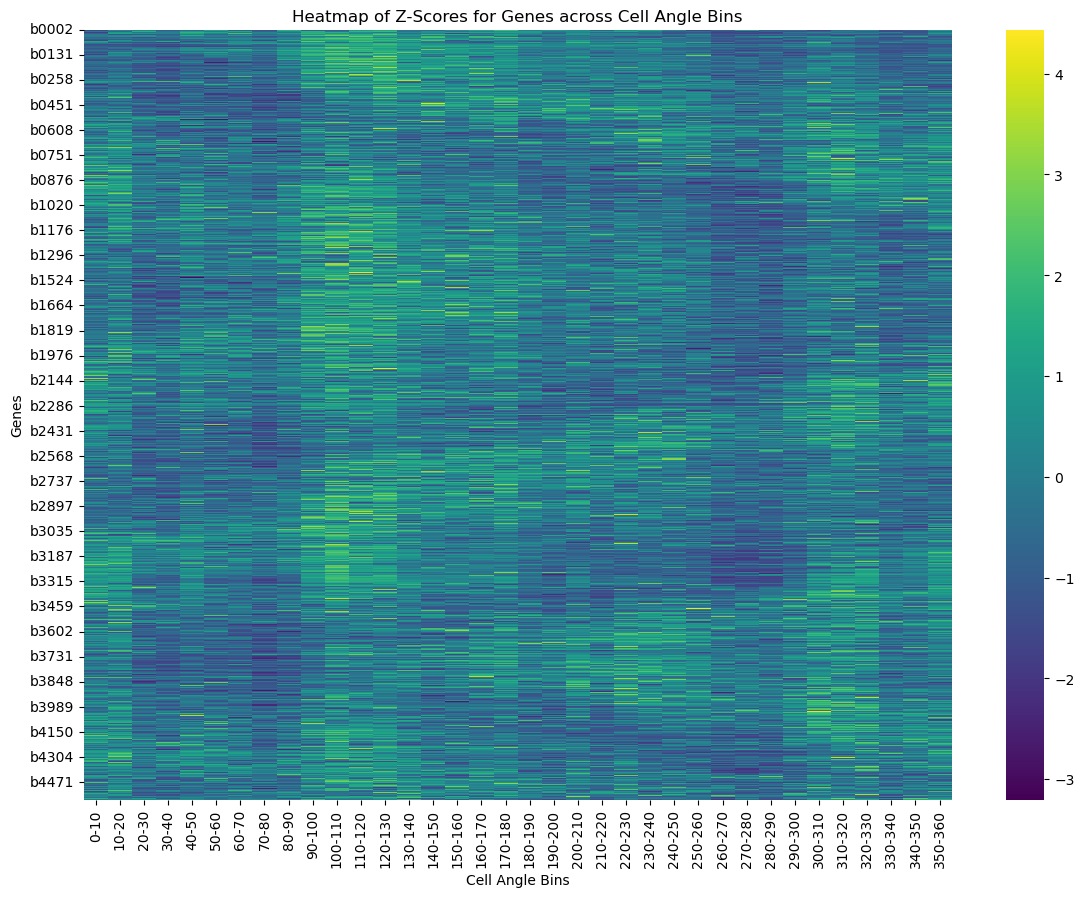

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming zscore_sum_df already exists from previous steps

# Ensure all values in zscore_sum_df are numeric
zscore_sum_df = zscore_sum_df.apply(pd.to_numeric, errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create the heatmap using seaborn
sns.heatmap(zscore_sum_df, cmap='viridis', annot=False, fmt=".2f")

# Set the labels and title
plt.xlabel('Cell Angle Bins')
plt.ylabel('Genes')
plt.title('Heatmap of Z-Scores for Genes across Cell Angle Bins')

# Customize y-axis to show tick marks for every 100th gene
num_genes = zscore_sum_df.shape[0]
plt.yticks(np.arange(0, num_genes, step=100), zscore_sum_df.index[::100])

# Show the plot
plt.show()

